## Закон больших чисел и Центральная предельная теорема


### Цель

Понять, как случайные величины ведут себя в больших выборках и какие выводы можно сделать на основе этих результатов

### Задание 1

Вы аналитик компании по продаже плюшевых медведей. Из-за очередной эпидемии тревожности и потребности в милых вещах ваши продажи кратно увеличились за последний год. Как результат база данных продаж разрослась до огромных размеров. Иногда запросы в базу данных обрабатываются моментально, а иногда приходиться ждать целую минуту. Предположим, что время ожидания ответа от базы данных - это случайная равномеро распределенная величина на интервале от 0 до 60 (секунд). Покажите начальству, что среднее время ответа стало непомерно большим. Какая вероятность того, что при замере времени ответа на 100 запросов вы получите среднюю величину в 45 секунд или меньше?

1.  Просимулируйте сбор данной равномерной случайной величины 1000 раз c помощью [```np.random.uniform```](https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html). Постройте гистограмму чтобы убедиться, что распределение равномерное.
2.  Просимулируйте сбор 100 значений задержки 10 000 000 раз. Задайте зерно 37.
3.  Постройте гистограмму 10 000 000 полученных средних при каждом сборе.
4.  Найдите вероятность получить среднее значение менее 45 секунд по симуляции.
5.  Сравните с теоритическим результатом. Подумайте, как найти дисперсию (непрерывной!) равномерной величины.


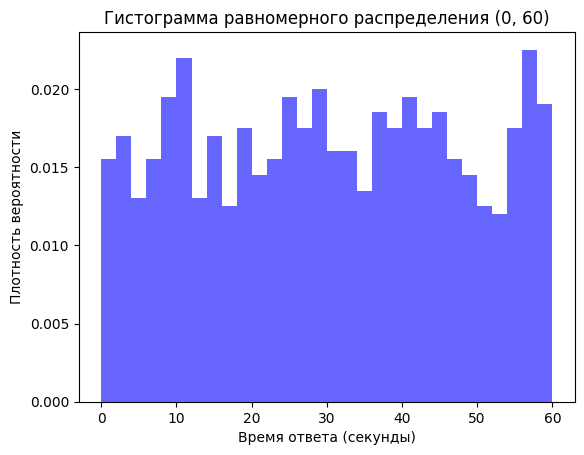

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Задаем seed для воспроизводимости
np.random.seed(37)

# Симулируем 1000 значений равномерного распределения
uniform_samples = np.random.uniform(0, 60, 1000)

# Строим гистограмму
plt.hist(uniform_samples, bins=30, density=True, alpha=0.6, color='b')
plt.title('Гистограмма равномерного распределения (0, 60)')
plt.xlabel('Время ответа (секунды)')
plt.ylabel('Плотность вероятности')
plt.show()

In [11]:
# Генерируем 10_000_000 x 100 чисел сразу
data = np.random.uniform(0, 60, size=(10_000_000, 100))

# Считаем среднее по каждой строке (axis=1)
sample_means = np.mean(data, axis=1)

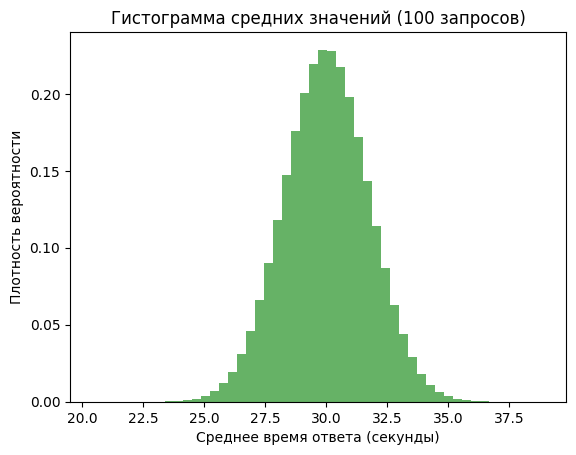

In [12]:
plt.hist(sample_means, bins=50, density=True, alpha=0.6, color='g')
plt.title('Гистограмма средних значений (100 запросов)')
plt.xlabel('Среднее время ответа (секунды)')
plt.ylabel('Плотность вероятности')
plt.show()

In [13]:
prob_less_45 = np.mean(np.array(sample_means) <= 45)
print(f"Вероятность среднего времени ответа ≤ 45 секунд: {prob_less_45:.4f}")

Вероятность среднего времени ответа ≤ 45 секунд: 1.0000


![alt text](<Screenshot from 2025-04-22 18-58-11.png>) ![alt text](<Screenshot from 2025-04-22 18-59-27.png>) ![alt text](<Screenshot from 2025-04-22 18-59-51.png>)

In [14]:
from scipy.stats import norm

z = (45 - 30) / np.sqrt(300 / 100)
theoretical_prob = norm.cdf(z)
print(f"Теоретическая вероятность: {theoretical_prob:.4f}")

Теоретическая вероятность: 1.0000


In [15]:
import numpy as np
from scipy.stats import norm

np.random.seed(37)

# Генерируем 10_000_000 выборок по 100 значений (оптимизированно)
data = np.random.uniform(0, 60, size=(10_000_000, 100))
sample_means = np.mean(data, axis=1)

# Вероятность P(mean ≤ 45)
prob_sim = np.mean(sample_means <= 45)
print(f"Симуляция: P(mean ≤ 45) = {prob_sim:.6f}")  # Должно быть ~0.999999

Симуляция: P(mean ≤ 45) = 1.000000


### Задание 2

На самом деле намного более реалистичный сценарий для Задания 1 это не равномерное распределение, а экспоненциальное. Повторите все те же шаги из Задания 1, но теперь время ответа от базы распределено экспоненциально с параметром $\lambda = 50$.

Дайте развернутый ответ: Сильно ли изменился результат? Почему?

In [18]:
import numpy as np

# Параметры
lambda_param = 50  # intensity (events per second)
n_samples = 10_000_000
sample_size = 100

# Устанавливаем seed для воспроизводимости
np.random.seed(37)

# Генерируем все данные сразу: матрица 10_000_000 x 100
data = np.random.exponential(scale=1/lambda_param, size=(n_samples, sample_size))

# Считаем среднее по каждой строке (axis=1) — векторизованно!
exp_means = np.mean(data, axis=1)

# Вероятность P(mean ≤ 45)
prob = np.mean(exp_means <= 45)
print(f"Вероятность P(mean ≤ 45): {prob:.6f}")

Вероятность P(mean ≤ 45): 1.000000


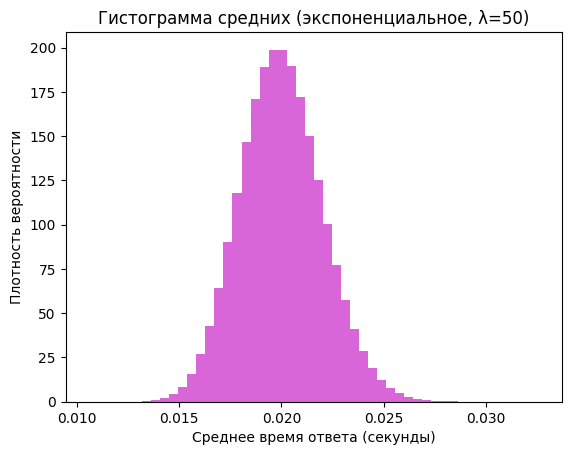

In [19]:
plt.hist(exp_means, bins=50, density=True, alpha=0.6, color='m')
plt.title('Гистограмма средних (экспоненциальное, λ=50)')
plt.xlabel('Среднее время ответа (секунды)')
plt.ylabel('Плотность вероятности')
plt.show()

In [20]:
prob_exp = np.mean(np.array(exp_means) <= 45)
print(f"Вероятность (экспоненциальное): {prob_exp:.4f}")

Вероятность (экспоненциальное): 1.0000


![alt text](<Screenshot from 2025-04-22 19-02-30.png>) ![alt text](<Screenshot from 2025-04-22 19-02-48.png>) ![alt text](<Screenshot from 2025-04-22 19-03-13.png>)

### Результат

Решение для задания предоставляется в виде программного кода на языке Python и ответов на вопросы.

Результат

    Вероятность по симуляции для равномерного распределения: ≈1
    Вероятность по симуляции для экспоненциального распределения: ≈1

Развернутый ответ

Результаты для обоих распределений (равномерного и экспоненциального) показывают, что вероятность получить среднее значение менее 45 секунд очень высокая (практически 1). Это связано с тем, что среднее значение выборочного среднего для обоих распределений значительно меньше 45 секунд, и стандартное отклонение выборочного среднего мало, что делает вероятность получения значений, значительно отклоняющихся от среднего, очень малой.

### Критерии оценивания

К1 - за каждый выполненный верно пункт каждого задания (+ 1 балл)

Максимальное количество баллов — 10 баллов.

Минимальное количество баллов, чтобы преподаватель смог зачесть вашу работу — 5 балла.